<a href="https://colab.research.google.com/github/kuanthum/bikes_dataton/blob/main/model_6_pipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos

In [4]:
df_train = pd.read_excel(r'/content/bike_train.xlsx')
df_test = pd.read_excel(r'/content/bike_test.xlsx')

# Data Exploration

### Datos faltantes y Tipo de datos

In [6]:
# A primera vista, no hay datos faltantes que imputar
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [5]:
# Considerar si hay que hacer transformaciones
# Pasar enteros a float
# Convertir fecha a ordinal o prescindir de la columna ya que las fechas estan desglosadas y ademas tenemos la columna instant
df_train.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [8]:
df_train.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


## Busqueda de correlaciones para ir teniendo un criterio sobre la selección de features

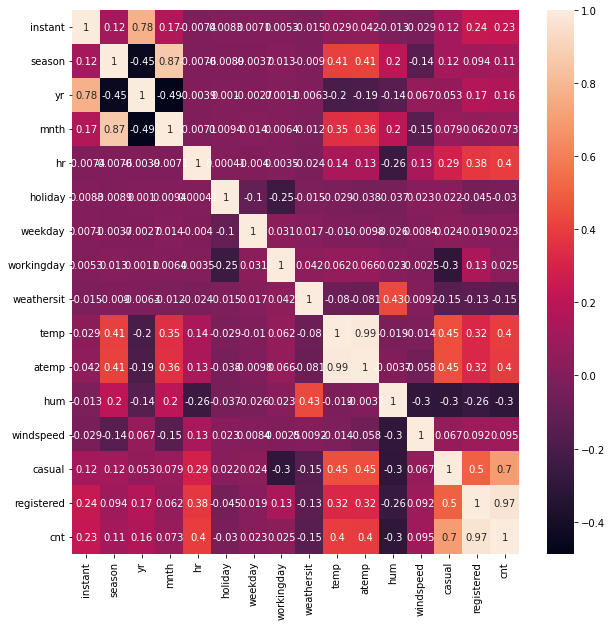

In [ ]:
# A primera vista podríamos considerar eliminar una de las variables de temperatura ya que están casi totalmente relacionadas.
# Podría optarse por utilizar 'atemp' dado que la sensación térmica considera la humedad y así elminar también la columna 'hum' para simplificar el input del modelo.
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [ ]:
# Exploración visual de correlación de variables
sns.pairplot(df_train)

In [ ]:
df_train.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


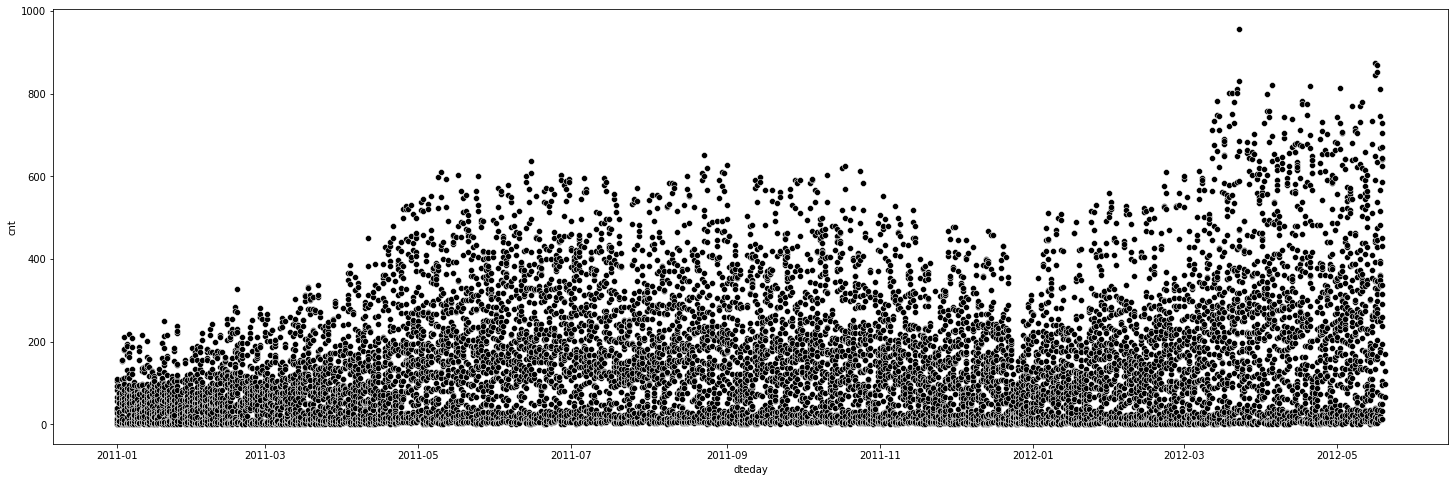

In [10]:
# Dado que el objetivo es predecir el número de bicicletas rentadas cada día ploteamos las variables pertinentes
plt.figure(figsize=(25,8))
ax = sns.scatterplot(
    data=df_train, x="dteday", y="cnt", color="black",
)

In [11]:
# Tomamos una muestra para ver mas en detalle que es lo que está ocurriendo
sample = df_train[(df_train['instant'] > 11500)]

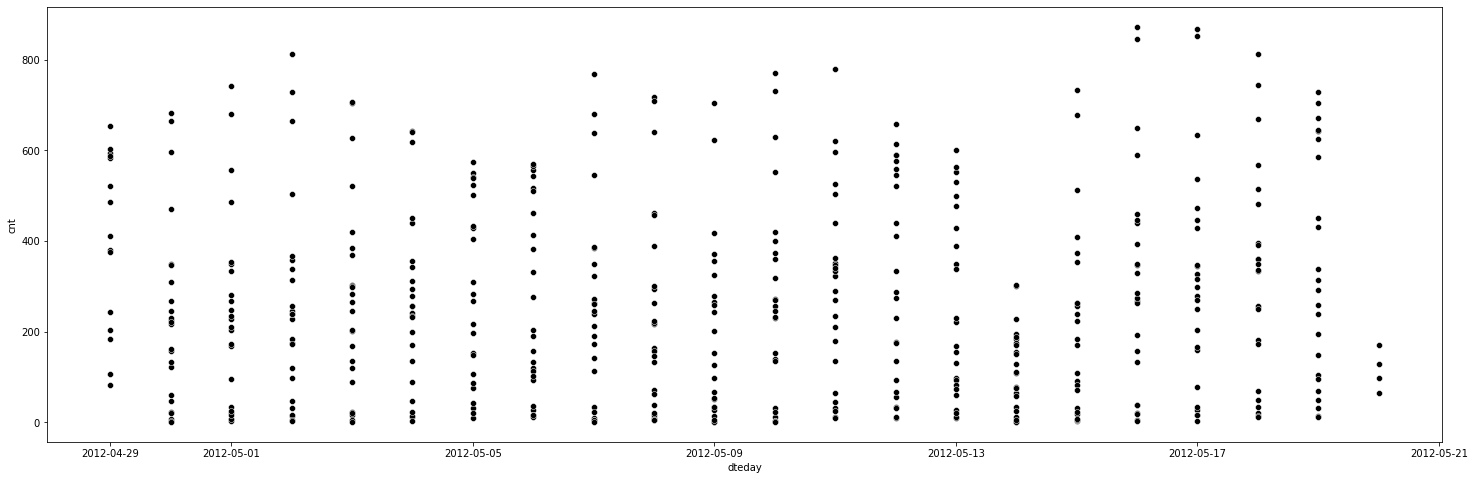

In [ ]:
# Tomando los días como x no se logra apreciar un patrón claro
plt.figure(figsize=(25,8))
ax = sns.scatterplot(
    data=sample, x="dteday", y="cnt", color="black",
)

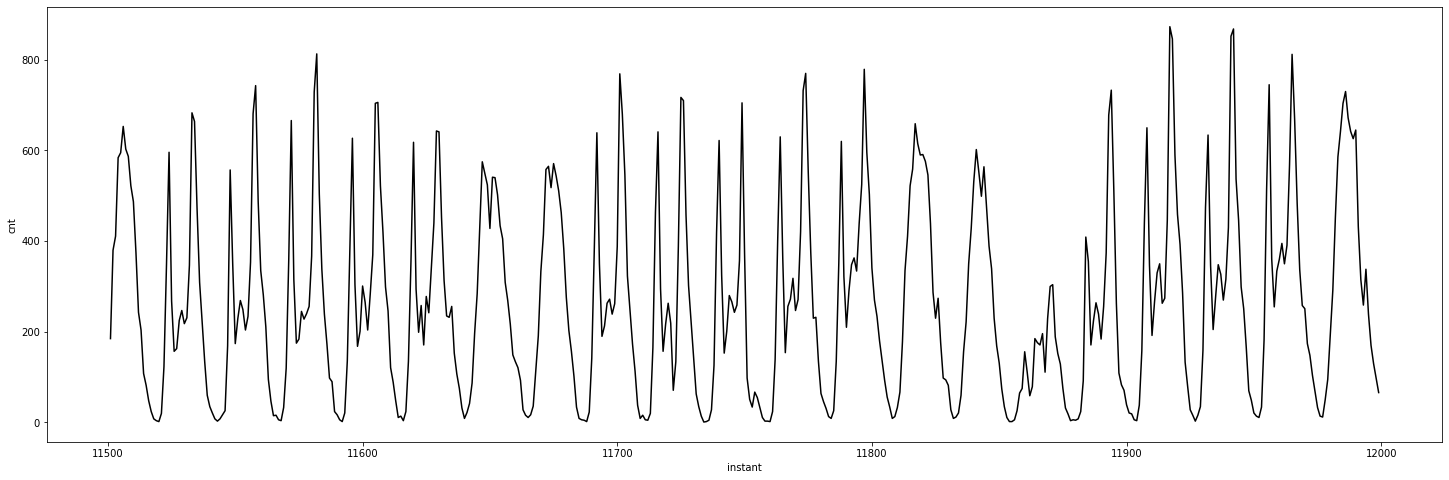

In [ ]:
# En este gráfico podemos apreciar la estacionalidad diaria
# Los días de semana presentan una baja, es decir, a cierta hora de la mañana y a cierta hora de la tarde tenemos picos
# En cambio los fines de semana no existe ese decaimiento
plt.figure(figsize=(25,8))
ax = sns.lineplot(
    data=sample, x="instant", y="cnt", color="black",
)

### Conclusiones de la exploración:
Dadas las características del modelo, debemos implementar un modelo de regresión. Sin embargo es evidente que el dataset presenta cierta complejidad por lo que no es conveneniente utilizar modelos de regressión lineal. Tampoco nos sirven modelos de regresión logística.

Lo que haremos será utilizar un ensamble de modelos como lo es el Gradient Boosting Regressor, que combina fundamentos de diferntes modelos como random forest(decisión en base a promedios) y adaboosting(optimización), permitiendo que el modelo se ajuste de manera iterativa con datos contiguos optimizando los resultados mediante una función de pérdida que se ajusta por pasos mediante descenso del gradiente.

### Manual Preproccesing

In [26]:
# Preparamos manualmente algunos datos
df_train.drop(columns=['dteday'], inplace=True)   #Eliminamos la columna con fechas ya que está desglosada y tenemos 'instant'. Windspeed parece te 
df_test.drop(columns=['dteday'], inplace=True)    
target = df_train.pop('cnt')                                                                               #Guardamos el target
columns = set(list(df_train.columns.values)).intersection(list(df_test.columns.values))                    #Eliminar columnas que no estan en el test dataset.
drop = [x for x in df_train.columns if x not in columns]          
df_train.drop(columns=drop, inplace=True)         

In [27]:
# Pasamos instant al final para ordenar las features en discretas
instant = df_train.pop('instant')   
instant_2 = df_test.pop('instant')
df_train = pd.concat([df_train,instant], axis=1)
df_test = pd.concat([df_test,instant_2], axis=1)

In [28]:
df_train = pd.concat([df_train, target], axis=1)

### Preparamos data para entrenar el modelo

In [29]:
X_train = df_train.to_numpy()[:, :-1]
y_train = target.to_numpy()
X_train.shape, y_train.shape

((11999, 13), (11999,))

In [30]:

X_test = df_test.to_numpy()#[:, :-1]
y_test = df_test.to_numpy()[:, 0]
X_test.shape, y_test.shape

((5380, 13), (5380,))

# Machine Learning

# Diseño de Pipeline:
  1. Selección de features.
  2. Grid Search (Validación cruzada) para encontrar los mejores hyperparametros.
  3. Gradient Boost Regressor
  4. Metricas

In [38]:
from sklearn.ensemble import GradientBoostingRegressor                          #Core model
from sklearn.model_selection import RepeatedKFold                               #https://www.youtube.com/watch?v=fKz-SgScM3Q
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as rmse
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

### Preprosesamiento
#### Dado que no es requerido hacer escalado pasamos a la selección de features

In [70]:
# Utilizamos SelectKBest con una función apta para el trabajo como f_regression (por default f_classif)
preprocessor = Pipeline(steps=
                        [('feature_selection', SelectKBest(score_func=f_regression, k=10)),
                         ('regressor', GradientBoostingRegressor())
                        ])
preprocessor.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 SelectKBest(score_func=<function f_regression at 0x7fbf39a1b7a0>)),
                ('regressor', GradientBoostingRegressor())])

In [71]:
mask = preprocessor['feature_selection'].get_support() # Valores booleanos para las columnas
new_features = df_train.columns[:-1][mask]         # Filtramos las columans elegidas
new_features

Index(['season', 'yr', 'mnth', 'hr', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'instant'],
      dtype='object')

In [72]:
# Vemos que descartó 'holiday','weekday' y 'workingday'
df_train.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'instant', 'cnt'],
      dtype='object')

### Elección de hyperparametros con GridSearch

In [97]:
grid = GridSearchCV(estimator = preprocessor,
                    param_grid = {"regressor__n_estimators": [500],       
                                  "regressor__learning_rate": [0.1],               
                                  "regressor__min_samples_split": [2],          
                                  "regressor__max_depth":  [9, 10],
                                  },
                    n_jobs=-1,
                    scoring = ["r2","neg_root_mean_squared_error"],
                    refit = "r2",
                    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
                    )

In [98]:
# Fiteamos 
grid_result = grid.fit(X_train, y_train)

In [99]:
# Vemos el porcentaje de aciertos en predicción
grid_result.best_score_

0.8515200029045655

In [100]:
# Mejores parametros
grid_result.best_params_

{'regressor__learning_rate': 0.1,
 'regressor__max_depth': 9,
 'regressor__min_samples_split': 2,
 'regressor__n_estimators': 500}

In [ ]:
# Detalle
grid_result.cv_results_

In [ ]:
# Mejores seteo de hyperparametros
grid_result.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
#importancia de features
grid.feature_importances_

## Predicción

In [104]:
# Exportamos predicciones
predictions = grid.predict(X_test)
output = pd.DataFrame({'pred': predictions})
output.to_csv('kuanthum_pipe_2.csv')

In [105]:
predictions

array([ 23.8393977 ,  23.3937197 ,  17.89661587, ..., 118.62272913,
        99.39396358,  57.69952961])

# Evaluación

In [114]:
# Evaluamos raiz del error cuadratico medio #last 91
rmse(y_train, grid.predict(X_train))

61.50289081656965

In [115]:
predicted = grid.predict(X_train)

In [116]:
df_predicted = df_train

In [117]:
df_predicted['predicted'] = predicted

In [118]:
df_predicted['value'] = y_train

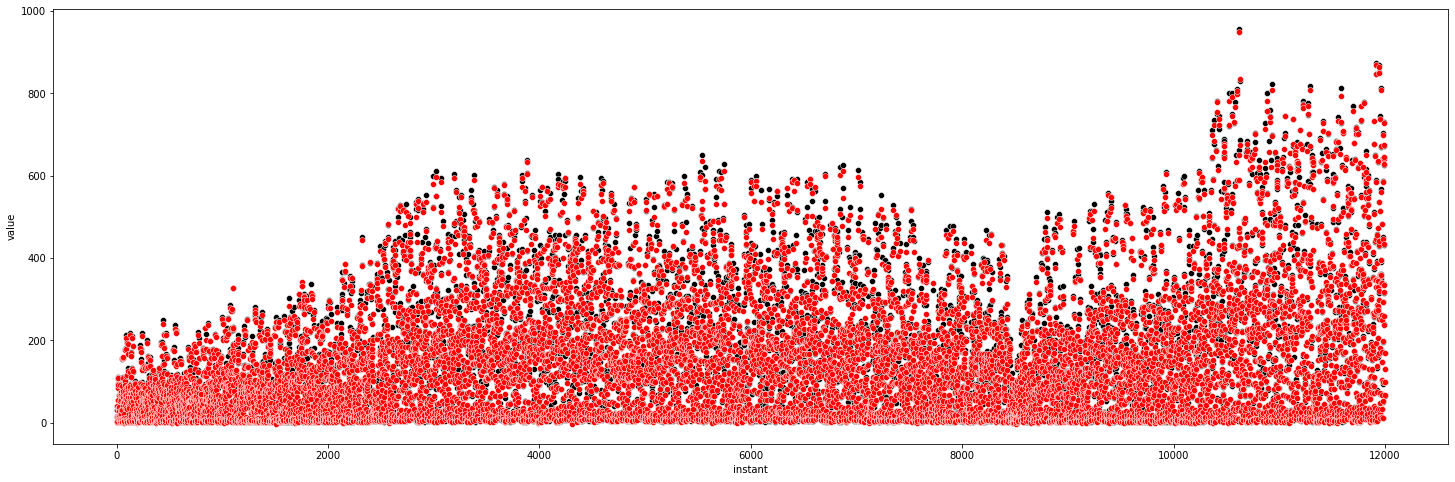

In [119]:
plt.figure(figsize=(25,8))
ax = sns.scatterplot(
    data=df_train, x="instant", y="value", color="black",
)
ax2 = sns.scatterplot(
    data=df_train, x='instant', y='predicted', color='red'
)

In [120]:
sample = df_predicted[(df_predicted['instant'] > 11500)]

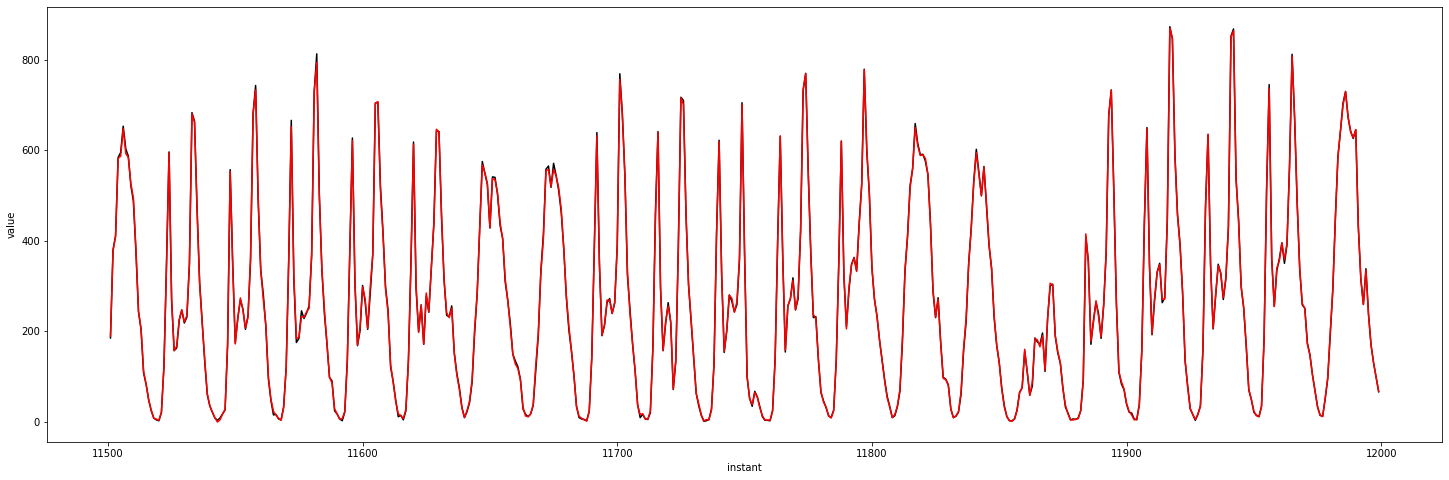

In [121]:
plt.figure(figsize=(25,8))
ax = sns.lineplot(
    data=sample, x="instant", y="value", color="black",
)
ax2 = sns.lineplot(
    data=sample, x='instant', y='predicted', color='red'
)

In [124]:
df_test['predict'] = predictions

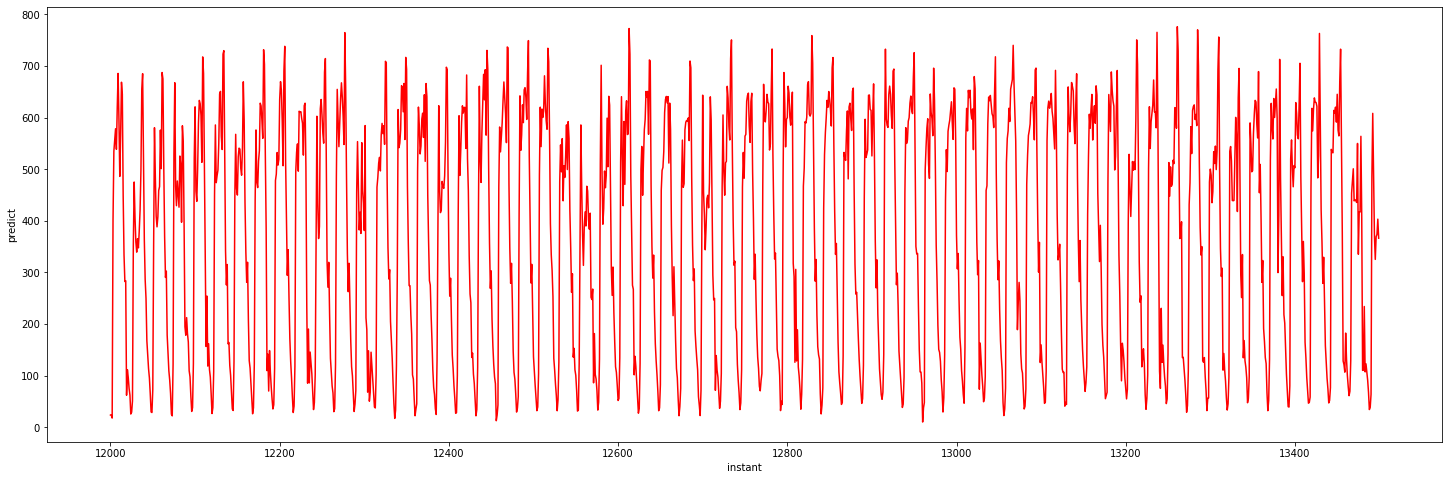

In [125]:
plt.figure(figsize=(25,8))
ax2 = sns.lineplot(
    data=df_test[(df_test['instant'] < 13500)], x='instant', y='predict', color='red'
)

In [ ]:
# Los gráficos muestran un evidente overfitting
# Hay features que aportan muy poco al modelo y se podrían prescindir